# Regresión lineal Múltiple

Realizamos una regresión lineal que involucra dos variables. Casi todos los problemas del mundo real con los que nos vamos a encontrar tendrán más de dos variables. La regresión lineal que involucra múltiples variables se llama __"regresión lineal múltiple"__ o __"regresión lineal multivariable"__. 

Los pasos para realizar la regresión lineal múltiple son casi similares a los de la regresión lineal simple. La diferencia radica en la evaluación. Se puede utilizar para averiguar qué factor tiene el mayor impacto en el resultado previsto y cómo se relacionan las diferentes variables entre sí.

Tenemos un dataset de la calidad del vino tinto. El dataset corresponde a las variantes rojas del vino portugués "Vinho Verde". Sólo se dispone de variables físico-químicas (los insumos) y sensoriales (el producto) (por ejemplo, no hay datos sobre los tipos de uva, la marca del vino, el precio de venta del vino, etc.).

Tendremos en cuenta varios atributos de entrada y basándonos en estos atributos haremos la __predicción sobre la calidad del vino__.

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [5]:
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Información de los datos

fixed acidity: :la mayoría de los ácidos involucrados con el vino o fijos o no volátiles (no se evaporan fácilmente).

volatile acidity: la cantidad de ácido acético en el vino, que a niveles demasiado altos puede conducir a un sabor desagradable a vinagre.

citric acid: se encuentra en pequeñas cantidades, el ácido cítrico puede agregar "frescura" y sabor a los vinos.

residual sugar: la cantidad de azúcar que queda después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo / litro y vinos con más de 45 gramos / litro se consideran dulces.

chlorides: la cantidad de sal en el vino.

free sulfur dioxide: la forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.

total sulfur dioxide: cantidad de formas libres y unidas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero a concentraciones libres de SO2 superiores a 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.

density: la densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.

pH: describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.

sulphates: un aditivo del vino que puede contribuir a los niveles de gas de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante.

alcohol: el porcentaje de contenido alcohólico del vino.

quality: variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).

#### Exploración de datos

In [6]:
import pandas as pd 

df = pd.read_csv('winequality.csv')
df.shape

(1599, 12)

#### Detalles estadísticos del conjunto de datos:

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Comprobar valores faltantes

In [ ]:
df.isnull().any()

_Todas las columnas deben dar False, en caso de que para cualquier columna se encuentre el resultado True, entonces se pueden eliminar todos los valores nulos de esa columna usando el código siguiente 'dataset=dataset.fillna(method='ffill')'_

#### Matriz de correlación

Muestra el grado de correlaciones, de cada variable en el conjunto de datos, con cada otra variable en el conjunto de datos. Es una representación de todos estos coeficientes de correlación de cada variable individual en los datos con cada otra variable en los datos.

El grado de correlación entre dos variables cualesquiera se representa de dos maneras, el color del cuadro o caja y el número dentro. Cuanto más fuerte sea el color, mayor será la magnitud de la correlación.

Cuanto más cerca esté el número de 1, mayor será la correlación. Si el número es positivo, establece una correlación positiva. Si es negativo establece una correlación negativa. 

1 y -1 establecen correlaciones perfectas entre las variables.

<AxesSubplot:>

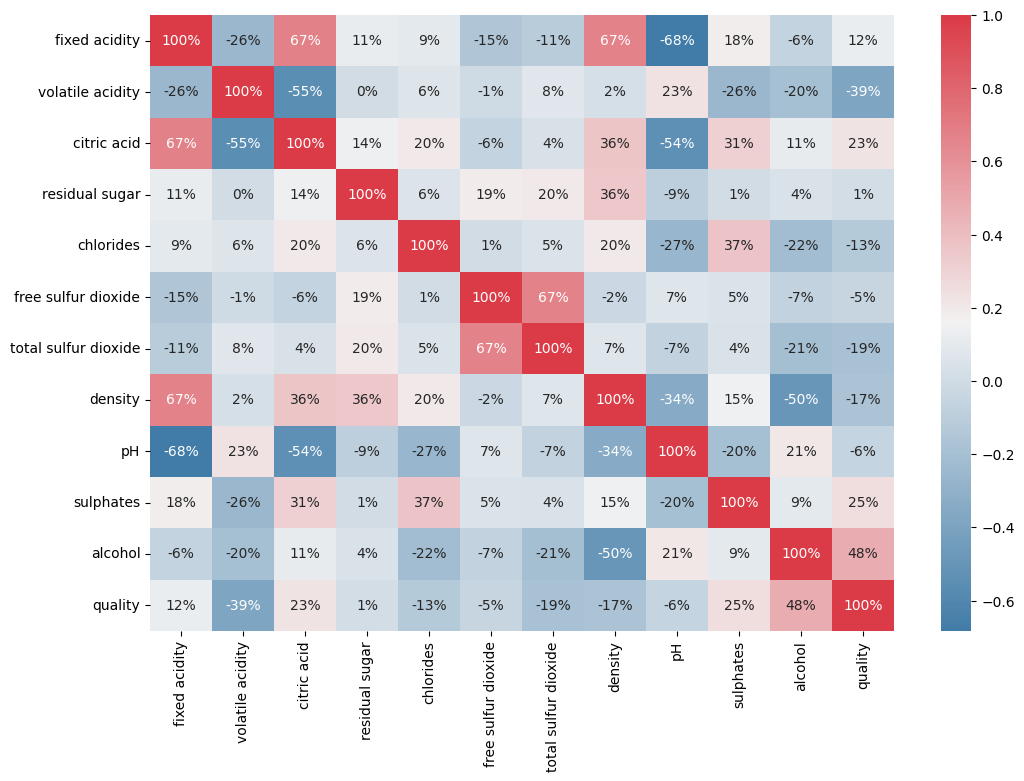

In [9]:
corr = df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

In [19]:
corr['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

_El alcohol es la característica más correlacionada._ 

In [12]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates','alcohol']].values
y = df['quality'].values

Comprobemos el valor medio de la columna "calidad".

AttributeError: 'Index' object has no attribute 'fixedAcidity'

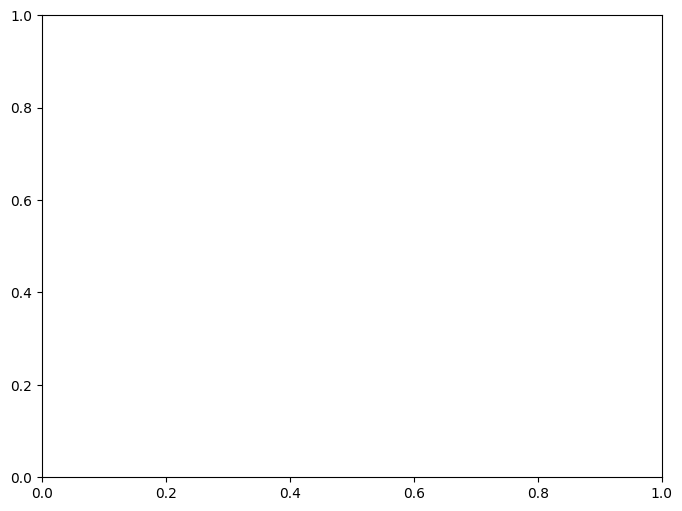

In [23]:
'''
Valor promedio de la calidad del vino
'''
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.hist(df.quantile,align='left',alpha=0.5)
ax1.set_xlabel('Calificación de calidad')



 
Como podemos observar, la mayoría de las veces el valor es 5 o 6. A continuación, dividimos el 80% de los datos para el conjunto de entrenamiento y  el 20% de los datos al conjunto de pruebas usando el código de abajo.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Entrenamiento

Ahora vamos a entrenar nuestro modelo

In [15]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
df = df.drop(['quality'], axis=1)
df = df.T

In [17]:
df = df.index
df

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Como se ha dicho antes, en el caso de la regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, ejecutamos el siguiente código:

In [18]:
coeff_df = pd.DataFrame(regressor.coef_, df, columns=['Coefficient']) 
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


Significa que para un aumento de una unidad en la "densidad", hay una disminución de 31,51 unidades en la calidad del vino. Del mismo modo, la disminución en una unidad de los "cloruros" resulta en un aumento de 1,87 unidades en la calidad del vino. Podemos ver que el resto de los atributos tienen muy poco efecto en la calidad del vino.”

#### Predicción sobre los datos de la prueba

In [ ]:
y_pred = regressor.predict(X_test)

Revisemos la diferencia entre el valor real y el valor previsto.

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head()

#### Comparación entre el valor real y el valor de la predicción

Ahora vamos a graficar la comparación de los valores reales y los valores de la predicción

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='darkgreen')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
'''
Gráfico de barras mostrando las diferencias entre los valores reales y los de la predicción.
'''

El modelo ha dado resultados aproximados de predicción, aunque hay valores que evidencian una diferencia notable. 

#### Métricas

El paso final es evaluar el rendimiento del algoritmo. Lo haremos encontrando los valores de MAE, MSE y RMSE. 

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Se puede ver que el valor de la raíz del error cuadrático medio es de 0,62, que es ligeramente superior al 10% del valor de la media que es de 5,63. Esto significa que nuestro algoritmo no fue muy preciso pero aún así puede hacer predicciones razonablemente buenas.

Hay muchos factores que pueden haber contribuido a esta inexactitud, por ejemplo:

1. Necesita más datos: Necesitamos una gran cantidad de datos para obtener la mejor predicción posible.
2. Malas suposiciones: Hicimos la suposición de que estos datos tienen una relación lineal, pero puede que no sea así. Visualizar los datos puede ayudar a determinar eso.
3. Atributos pobres: Los atributos  que usamos pueden no tener una correlación lo suficientemente alta con los valores que tratamos de predecir.

#### Regresión aplicada a un grupo de características

A modo de ejemplo se realiza una estimación de calidad basada en solo un grupo de características. Para ello vamos a utilizar Regresión Lineal. También trazaremos los valores de predicción y calidad verdadera.

In [ ]:
df = pd.read_csv('winequality.csv')
X = df.loc[:,['alcohol','sulphates','citric acid','volatile acidity']]
y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

In [ ]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Predicción usando Regresión Lineal")
plt.xlabel("Calidad Real")
plt.ylabel("Predicción")
plt.show()